## Importando Librerias

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image



from modules import entrenamiento


## paraametros

In [2]:
epocas=3
#192
loteTrain=160
loteVal=160

In [3]:
obj= entrenamiento.TrainingModules()

## Definir el dispositivo de ejecucion (GPU si está disponible)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Se esta usando : ",device)

Se esta usando :  cuda:0


## Directorios de las imágenes

In [5]:
obj.train_violent_dir = "../Database/train/violencia/"
obj.train_non_violent_dir = "../Database/train/no_violencia/"

obj.test_violent_dir = "../Database/test/violencia/"
obj.test_non_violent_dir = "../Database/test/no_violencia/"

## Definiendo  algoritmos de muestreo 

In [6]:
# Definir el diccionario de muestreos

metodos = [
    "Original",
    "RandomOverSampler",
    "RandomUnderSampler",
    "SMOTE",
    "ADASYN",
    "OneSidedSelection",
    "NearMiss",
    "TomekLinks",
    "SMOTETomek",
    "SMOTEENN",
    "ENN"
]


## Cargar datos de entrenamiento

In [7]:
# Imprimir la ruta actual del script

X_train_violent, y_train_violent = obj.load_images_and_labels(obj.train_violent_dir, 1)
X_train_non_violent, y_train_non_violent = obj.load_images_and_labels(obj.train_non_violent_dir, 0)

X_train = np.concatenate((X_train_violent, X_train_non_violent), axis=0)
y_train = np.concatenate((y_train_violent, y_train_non_violent), axis=0)
## liberando memoria
del X_train_violent
del y_train_violent
del X_train_non_violent
del y_train_non_violent 

Inicindo proceso con el metodo:  Original
No se balancea la Base de datos: Original


Entrenando:  33%|███▎      | 1/3 [00:07<00:14,  7.16s/iter]

Epoch [1/3], Train Loss: 0.2516, Train Acc: 90.49%, Val Loss: 3.1321, Val Acc: 68.64%


Entrenando:  67%|██████▋   | 2/3 [00:13<00:06,  6.80s/iter]

Epoch [2/3], Train Loss: 0.0057, Train Acc: 99.89%, Val Loss: 0.0583, Val Acc: 99.26%


Entrenando: 100%|██████████| 3/3 [00:20<00:00,  6.77s/iter]

Epoch [3/3], Train Loss: 0.0010, Train Acc: 100.00%, Val Loss: 0.0173, Val Acc: 99.70%


Test Accuracy: 86.75%
Precision: 1.000000
Recall: 0.735000
F1 Score: 0.847262
G-Mean: 0.857321
Resultados guardados en ../resources/metricas/ResNet18_resultados_Original.txt


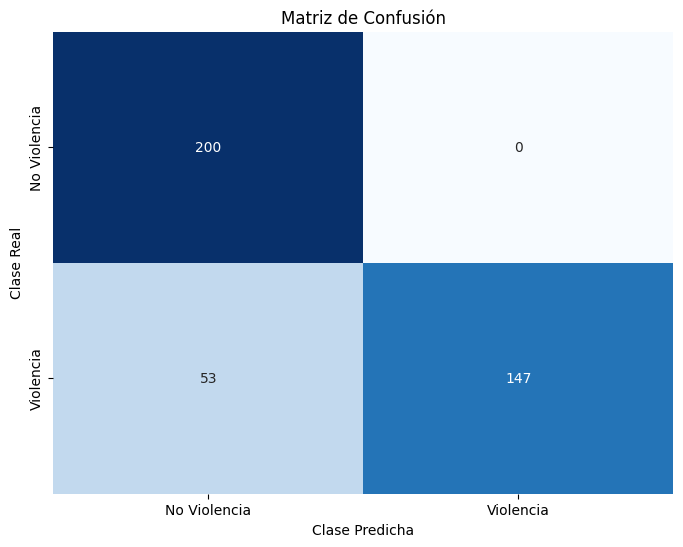

Inicindo proceso con el metodo:  RandomOverSampler
Balanceando Base de datos con: RandomOverSampler


Entrenando:  33%|███▎      | 1/3 [00:09<00:19,  9.56s/iter]

Epoch [1/3], Train Loss: 0.2510, Train Acc: 92.29%, Val Loss: 0.0545, Val Acc: 98.54%


Entrenando:  67%|██████▋   | 2/3 [00:18<00:09,  9.46s/iter]

Epoch [2/3], Train Loss: 0.0029, Train Acc: 99.95%, Val Loss: 0.0102, Val Acc: 99.79%


Entrenando: 100%|██████████| 3/3 [00:28<00:00,  9.40s/iter]

Epoch [3/3], Train Loss: 0.0006, Train Acc: 100.00%, Val Loss: 0.0110, Val Acc: 99.79%


Test Accuracy: 92.00%
Precision: 1.000000
Recall: 0.840000
F1 Score: 0.913043
G-Mean: 0.916515
Resultados guardados en ../resources/metricas/ResNet18_resultados_RandomOverSampler.txt


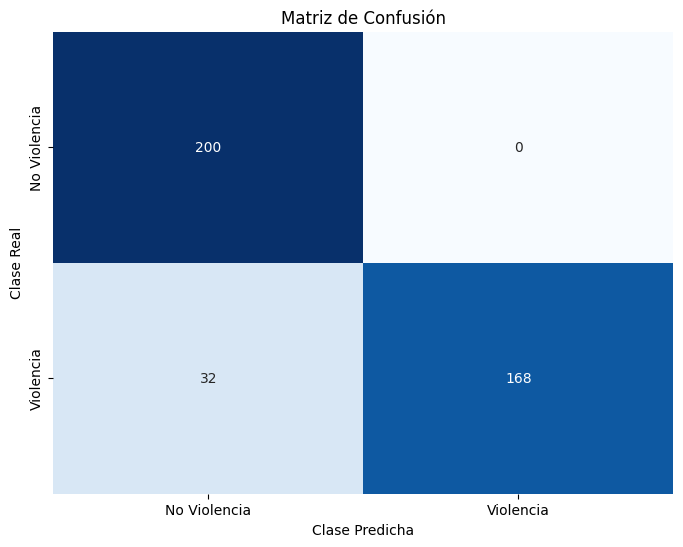

Inicindo proceso con el metodo:  RandomUnderSampler
Balanceando Base de datos con: RandomUnderSampler


Entrenando:  33%|███▎      | 1/3 [00:03<00:07,  3.90s/iter]

Epoch [1/3], Train Loss: 0.4573, Train Acc: 82.85%, Val Loss: 3.4844, Val Acc: 55.50%


Entrenando:  67%|██████▋   | 2/3 [00:07<00:03,  3.87s/iter]

Epoch [2/3], Train Loss: 0.0329, Train Acc: 98.98%, Val Loss: 4.2810, Val Acc: 52.43%


Entrenando: 100%|██████████| 3/3 [00:11<00:00,  3.87s/iter]

Epoch [3/3], Train Loss: 0.0098, Train Acc: 99.81%, Val Loss: 0.0091, Val Acc: 99.74%


Test Accuracy: 88.50%
Precision: 0.866667
Recall: 0.910000
F1 Score: 0.887805
G-Mean: 0.884647
Resultados guardados en ../resources/metricas/ResNet18_resultados_RandomUnderSampler.txt


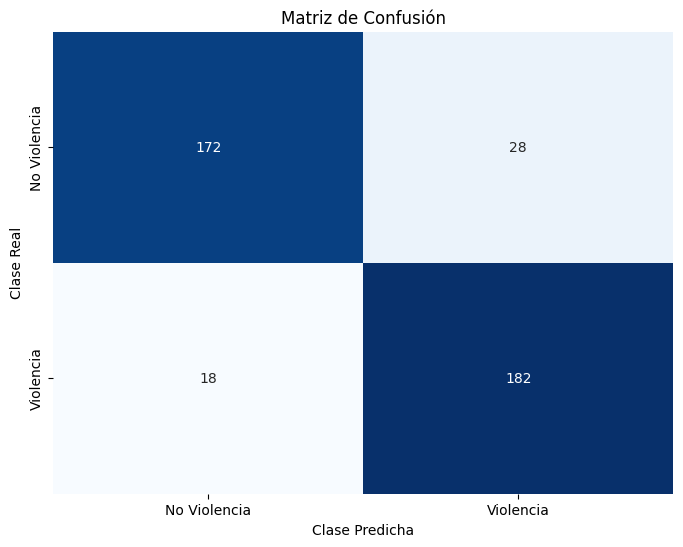

Inicindo proceso con el metodo:  SMOTE
Balanceando Base de datos con: SMOTE


Entrenando:  33%|███▎      | 1/3 [00:09<00:19,  9.71s/iter]

Epoch [1/3], Train Loss: 0.2002, Train Acc: 93.12%, Val Loss: 0.1041, Val Acc: 95.21%


Entrenando:  67%|██████▋   | 2/3 [00:19<00:09,  9.51s/iter]

Epoch [2/3], Train Loss: 0.0046, Train Acc: 99.90%, Val Loss: 0.0067, Val Acc: 99.69%


Entrenando: 100%|██████████| 3/3 [00:28<00:00,  9.44s/iter]

Epoch [3/3], Train Loss: 0.0005, Train Acc: 100.00%, Val Loss: 0.0050, Val Acc: 99.79%


Test Accuracy: 92.25%
Precision: 1.000000
Recall: 0.845000
F1 Score: 0.915989
G-Mean: 0.919239
Resultados guardados en ../resources/metricas/ResNet18_resultados_SMOTE.txt


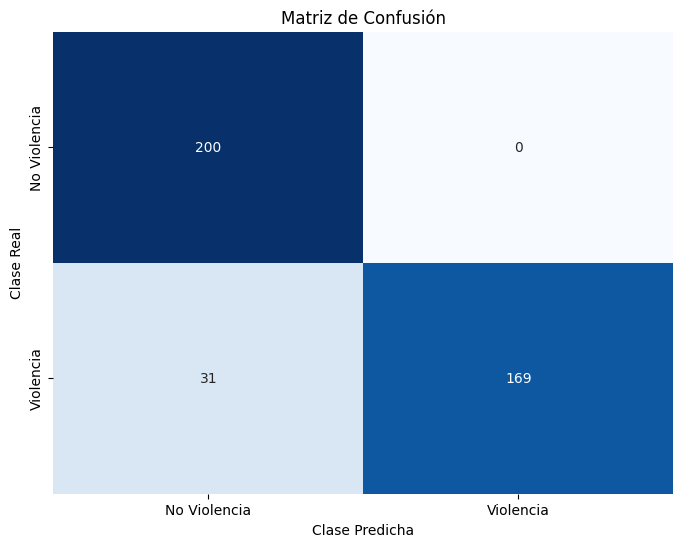

Inicindo proceso con el metodo:  ADASYN
Balanceando Base de datos con: ADASYN


Entrenando:  33%|███▎      | 1/3 [00:10<00:20, 10.02s/iter]

Epoch [1/3], Train Loss: 0.3247, Train Acc: 92.09%, Val Loss: 0.1468, Val Acc: 92.51%


Entrenando:  67%|██████▋   | 2/3 [00:19<00:09,  9.58s/iter]

Epoch [2/3], Train Loss: 0.0748, Train Acc: 98.36%, Val Loss: 0.1157, Val Acc: 94.48%


Entrenando: 100%|██████████| 3/3 [00:28<00:00,  9.52s/iter]

Epoch [3/3], Train Loss: 0.0061, Train Acc: 99.90%, Val Loss: 0.0059, Val Acc: 99.79%


Test Accuracy: 92.75%
Precision: 0.952381
Recall: 0.900000
F1 Score: 0.925450
G-Mean: 0.927092
Resultados guardados en ../resources/metricas/ResNet18_resultados_ADASYN.txt


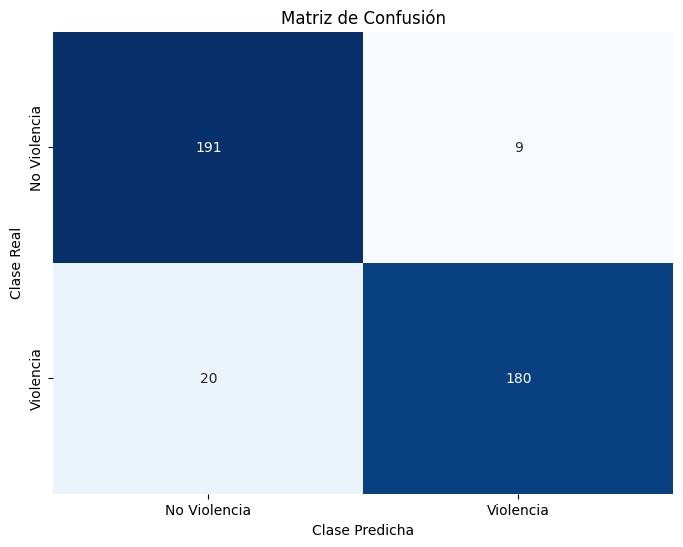

Inicindo proceso con el metodo:  OneSidedSelection
Balanceando Base de datos con: OneSidedSelection


Entrenando:  33%|███▎      | 1/3 [00:06<00:13,  6.82s/iter]

Epoch [1/3], Train Loss: 0.3663, Train Acc: 89.18%, Val Loss: 0.6864, Val Acc: 86.08%


Entrenando:  67%|██████▋   | 2/3 [00:13<00:06,  6.64s/iter]

Epoch [2/3], Train Loss: 0.0120, Train Acc: 99.74%, Val Loss: 0.2758, Val Acc: 91.17%


Entrenando: 100%|██████████| 3/3 [00:19<00:00,  6.63s/iter]

Epoch [3/3], Train Loss: 0.0035, Train Acc: 99.89%, Val Loss: 0.0091, Val Acc: 99.70%


Test Accuracy: 85.25%
Precision: 0.898305
Recall: 0.795000
F1 Score: 0.843501
G-Mean: 0.850559
Resultados guardados en ../resources/metricas/ResNet18_resultados_OneSidedSelection.txt


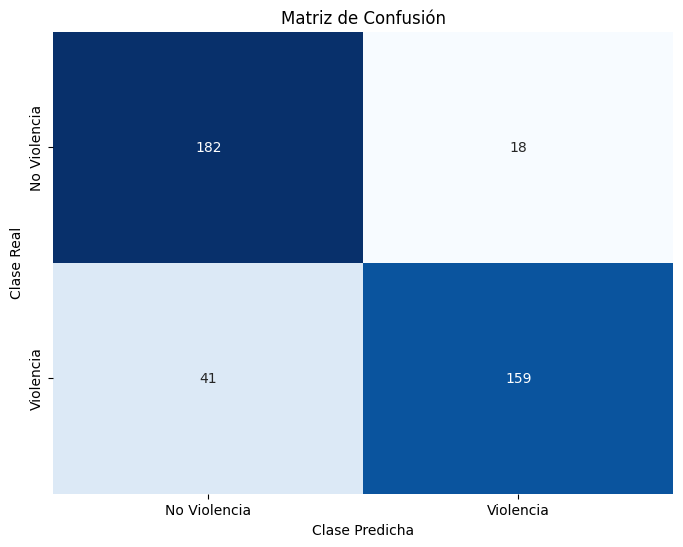

Inicindo proceso con el metodo:  NearMiss
Balanceando Base de datos con: NearMiss


Entrenando:  33%|███▎      | 1/3 [00:03<00:07,  3.98s/iter]

Epoch [1/3], Train Loss: 0.2854, Train Acc: 87.97%, Val Loss: 12.7432, Val Acc: 50.90%


Entrenando:  67%|██████▋   | 2/3 [00:07<00:03,  3.88s/iter]

Epoch [2/3], Train Loss: 0.0156, Train Acc: 99.55%, Val Loss: 0.1375, Val Acc: 94.12%


Entrenando: 100%|██████████| 3/3 [00:11<00:00,  3.86s/iter]

Epoch [3/3], Train Loss: 0.0034, Train Acc: 99.94%, Val Loss: 0.0481, Val Acc: 98.72%


Test Accuracy: 74.50%
Precision: 0.772222
Recall: 0.695000
F1 Score: 0.731579
G-Mean: 0.743320
Resultados guardados en ../resources/metricas/ResNet18_resultados_NearMiss.txt


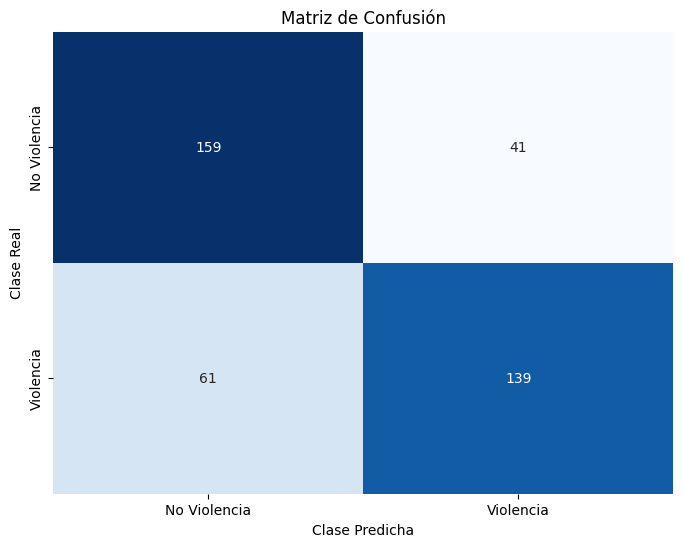

Inicindo proceso con el metodo:  TomekLinks
Balanceando Base de datos con: TomekLinks


Entrenando:  33%|███▎      | 1/3 [00:06<00:13,  6.90s/iter]

Epoch [1/3], Train Loss: 0.4326, Train Acc: 88.41%, Val Loss: 1.2674, Val Acc: 73.22%


Entrenando:  67%|██████▋   | 2/3 [00:13<00:06,  6.65s/iter]

Epoch [2/3], Train Loss: 0.0106, Train Acc: 99.70%, Val Loss: 0.0443, Val Acc: 99.11%


Entrenando: 100%|██████████| 3/3 [00:19<00:00,  6.63s/iter]

Epoch [3/3], Train Loss: 0.0014, Train Acc: 100.00%, Val Loss: 0.0130, Val Acc: 99.85%


Test Accuracy: 88.50%
Precision: 0.993590
Recall: 0.775000
F1 Score: 0.870787
G-Mean: 0.878137
Resultados guardados en ../resources/metricas/ResNet18_resultados_TomekLinks.txt


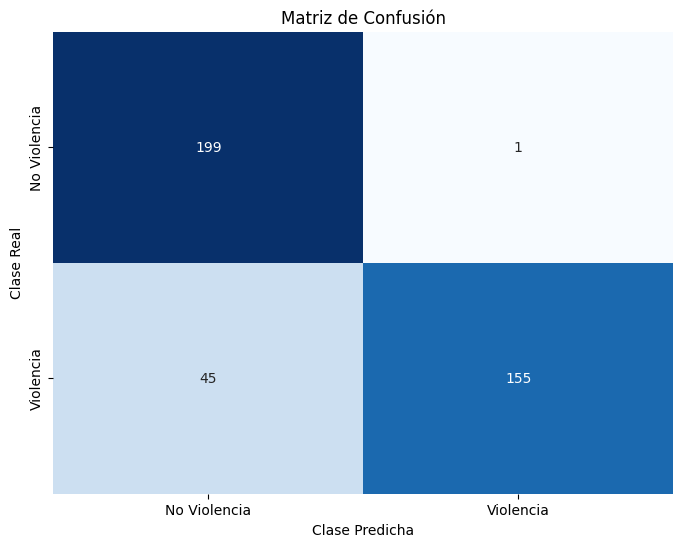

Inicindo proceso con el metodo:  SMOTETomek
Balanceando Base de datos con: SMOTETomek


Entrenando:  33%|███▎      | 1/3 [00:09<00:19,  9.69s/iter]

Epoch [1/3], Train Loss: 0.1342, Train Acc: 94.19%, Val Loss: 1.1593, Val Acc: 82.92%


Entrenando:  67%|██████▋   | 2/3 [00:19<00:09,  9.50s/iter]

Epoch [2/3], Train Loss: 0.0049, Train Acc: 99.90%, Val Loss: 0.0028, Val Acc: 99.90%


Entrenando: 100%|██████████| 3/3 [00:28<00:00,  9.49s/iter]

Epoch [3/3], Train Loss: 0.0007, Train Acc: 100.00%, Val Loss: 0.0005, Val Acc: 100.00%


Test Accuracy: 92.75%
Precision: 1.000000
Recall: 0.855000
F1 Score: 0.921833
G-Mean: 0.924662
Resultados guardados en ../resources/metricas/ResNet18_resultados_SMOTETomek.txt


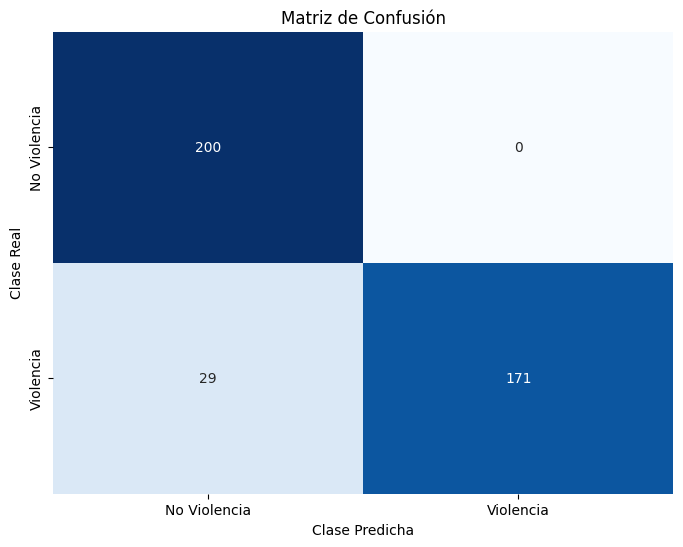

Inicindo proceso con el metodo:  SMOTEENN
Balanceando Base de datos con: SMOTEENN


Entrenando:  33%|███▎      | 1/3 [00:09<00:18,  9.08s/iter]

Epoch [1/3], Train Loss: 0.1879, Train Acc: 93.85%, Val Loss: 0.0103, Val Acc: 99.79%


Entrenando:  67%|██████▋   | 2/3 [00:17<00:08,  8.90s/iter]

Epoch [2/3], Train Loss: 0.0023, Train Acc: 100.00%, Val Loss: 0.0101, Val Acc: 99.79%


Entrenando: 100%|██████████| 3/3 [00:26<00:00,  8.90s/iter]

Epoch [3/3], Train Loss: 0.0007, Train Acc: 100.00%, Val Loss: 0.0125, Val Acc: 99.68%


Test Accuracy: 92.00%
Precision: 1.000000
Recall: 0.840000
F1 Score: 0.913043
G-Mean: 0.916515
Resultados guardados en ../resources/metricas/ResNet18_resultados_SMOTEENN.txt


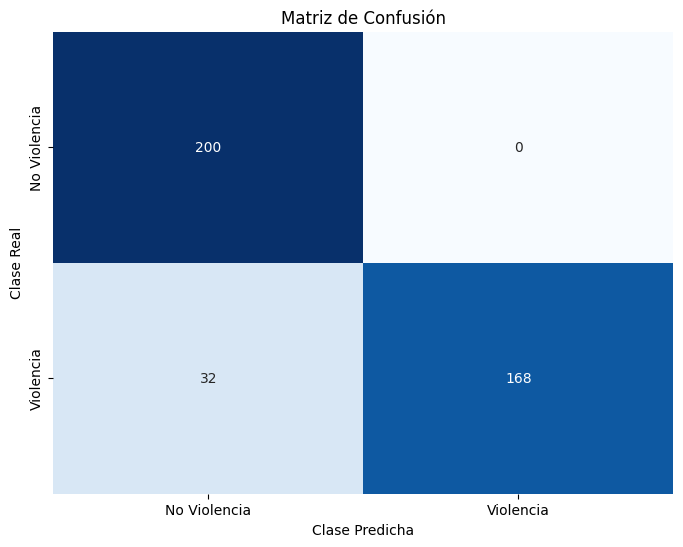

Inicindo proceso con el metodo:  ENN
Balanceando Base de datos con: ENN


Entrenando:  33%|███▎      | 1/3 [00:06<00:13,  6.58s/iter]

Epoch [1/3], Train Loss: 0.3381, Train Acc: 88.14%, Val Loss: 2.2951, Val Acc: 72.44%


Entrenando:  67%|██████▋   | 2/3 [00:12<00:06,  6.40s/iter]

Epoch [2/3], Train Loss: 0.0142, Train Acc: 99.74%, Val Loss: 0.2002, Val Acc: 91.56%


Entrenando: 100%|██████████| 3/3 [00:19<00:00,  6.38s/iter]

Epoch [3/3], Train Loss: 0.0018, Train Acc: 100.00%, Val Loss: 0.0121, Val Acc: 99.85%


Test Accuracy: 89.00%
Precision: 1.000000
Recall: 0.780000
F1 Score: 0.876404
G-Mean: 0.883176
Resultados guardados en ../resources/metricas/ResNet18_resultados_ENN.txt


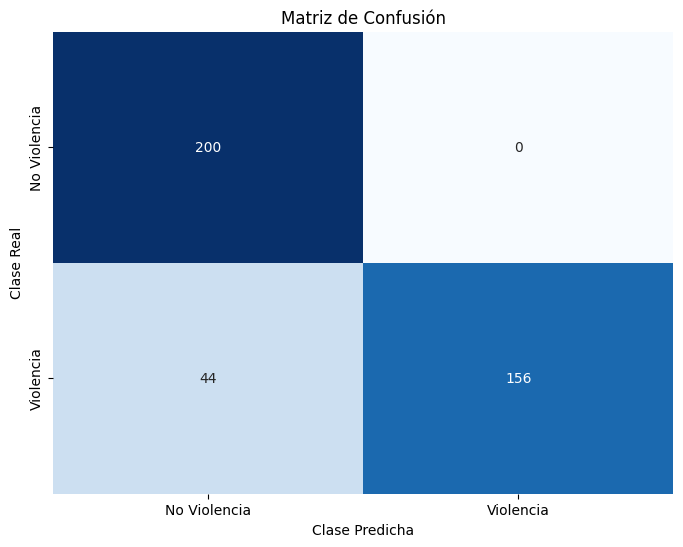

In [8]:
for mm in metodos:
    print("Inicindo proceso con el metodo: ",mm)
    X_sampled,y_sampled=obj.muestreo(X_train,y_train,mm)
    ## Dividir los datos de entrenamiento en entrenamiento y validación
    X_train_sampled, X_val, y_train_sampled, y_val = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)
    ## convertir a tensores
    train_inputs = torch.tensor(X_train_sampled, dtype=torch.float32).permute(0, 3, 1, 2)
    train_labels = torch.tensor(y_train_sampled, dtype=torch.long)
    val_inputs = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)
    val_labels = torch.tensor(y_val, dtype=torch.long).to(device)  # Mover val_labels a la GPU
    ## vaciando variables para desocupar RAM
    del y_train_sampled
    del X_train_sampled
    del X_sampled
    del X_val
    del y_sampled
    del y_val 
    ### crear datasets y dataloaders
    train_dataset = TensorDataset(train_inputs, train_labels)
    val_dataset = TensorDataset(val_inputs, val_labels)
    train_loader = DataLoader(train_dataset, batch_size=loteTrain, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=loteVal, shuffle=True)  # DataLoader para validación
    ## liberando memoria


    del train_inputs 
    del train_labels 
    del val_inputs 
    del val_labels 
    ##
   
    ##
    model = obj.getModel()
    ##mover modelo a la gpu o en su defecto al cpu
    model = model.to(device) 
    ## se define el criterio de perdida y el otimizador 
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.Adam(model.parameters(), lr=0.001) 
    #optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4, weight_decay=1e-2)
    # Definir el optimizador Adam para las capas no congeladas
    #optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    optimizer = optim.Adam(model.parameters(), lr=0.001) 
    ################    Entrenamiento


    obj.fit(epocas,model,device,train_loader,val_loader,optimizer,criterion,len(train_dataset))
    #liberando memoria
    torch.cuda.empty_cache()
    del train_dataset
    del val_dataset 
    del val_loader 
    ########## guardar modelo

    torch.save(model.state_dict(), "../resources/modelos_Y_pesos/ResNet18"+mm+".pth")
    del optimizer
    del train_loader

    ###
    #       Test
    ###
    #cargar datos de prueba
    X_test_violent, y_test_violent = obj.load_images_and_labels(obj.test_violent_dir, 1)
    X_test_non_violent, y_test_non_violent = obj.load_images_and_labels(obj.test_non_violent_dir, 0)

    X_test = np.concatenate((X_test_violent, X_test_non_violent), axis=0)
    y_test = np.concatenate((y_test_violent, y_test_non_violent), axis=0)

    ##liberando memoria
    del X_test_violent
    del y_test_violent
    del X_test_non_violent
    del y_test_non_violent 
    #convertir a tensores
    test_inputs = torch.tensor(np.array(X_test), dtype=torch.float32).permute(0, 3, 1, 2)
    test_labels = torch.tensor(y_test, dtype=torch.long)

    ##crear dataset de eprueba
    test_dataset = TensorDataset(test_inputs, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    ###liberando memoria
    del test_inputs 
    del test_labels 
    del X_test 
    del y_test 

    ##evaluacion del conjunto de test
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in test_loader:  
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    ## metricas para  conjuntos de test desbalanceados
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    gmean = np.sqrt(recall * (tn / (tn + fp)))  # G-Mean

    print(f"Test Accuracy: {100 * np.mean(np.array(y_true) == np.array(y_pred)):.2f}%")
    print(f"Precision: {precision:.6f}")
    print(f"Recall: {recall:.6f}")
    print(f"F1 Score: {f1:.6f}")
    print(f"G-Mean: {gmean:.6f}")

    # Nombre del archivo para guardar los resultados
    filename = "../resources/metricas/ResNet18_resultados_"+mm+".txt"

    # Guardar en archivo de texto
    with open(filename, 'w') as f:
        f.write(f"Test Accuracy: {100 * np.mean(np.array(y_true) == np.array(y_pred)):.2f}%\n")
        f.write(f"Precision: {precision:.4f}\n")
        f.write(f"Recall: {recall:.4f}\n")
        f.write(f"F1 Score: {f1:.4f}\n")
        f.write(f"G-Mean: {gmean:.4f}\n")

    print(f"Resultados guardados en {filename}")


    ## Matriz de confucion    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Violencia", "Violencia"], yticklabels=["No Violencia", "Violencia"])
    plt.xlabel("Clase Predicha")
    plt.ylabel("Clase Real")
    plt.title("Matriz de Confusión")
    plt.savefig("../resources/confusion_matrix/ResNet18"+mm+".png")
    plt.show()
    plt.close()